# 🍽️ Zomato Data Analysis Using Python

This notebook performs an exploratory data analysis (EDA) on Zomato restaurant data.  
We aim to understand patterns in customer preferences, rating behavior, and pricing by analyzing the following features:

- Online ordering
- Table booking
- Ratings and votes
- Cost for two people
- Restaurant type

Let's begin by importing the necessary libraries and loading the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Zomato-data-.csv")
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


## 🧾 Data Overview
Let's understand the structure of the dataset.


In [2]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

## 🧹 Data Cleaning
We'll clean and convert some columns to the appropriate data types for analysis.


In [3]:
# Clean 'rate' column
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)
df['rate'] = df['rate'].str.replace('/5', '', regex=False).astype(float)

# Clean 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# Convert Yes/No to Boolean
df['online_order'] = df['online_order'].map({'Yes': True, 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True, 'No': False})

df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,True,True,4.1,775,800.0,Buffet
1,Spice Elephant,True,False,4.1,787,800.0,Buffet
2,San Churro Cafe,True,False,3.8,918,800.0,Buffet
3,Addhuri Udupi Bhojana,False,False,3.7,88,300.0,Buffet
4,Grand Village,False,False,3.8,166,600.0,Buffet


## 📊 Exploratory Data Analysis
Let’s visualize how various features relate to each other.


### Online Order vs Rating


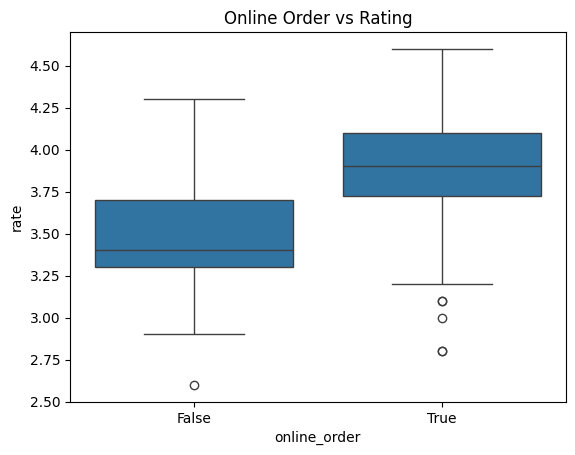

In [4]:
sns.boxplot(x='online_order', y='rate', data=df)
plt.title("Online Order vs Rating")
plt.show()


### Table Booking vs Votes


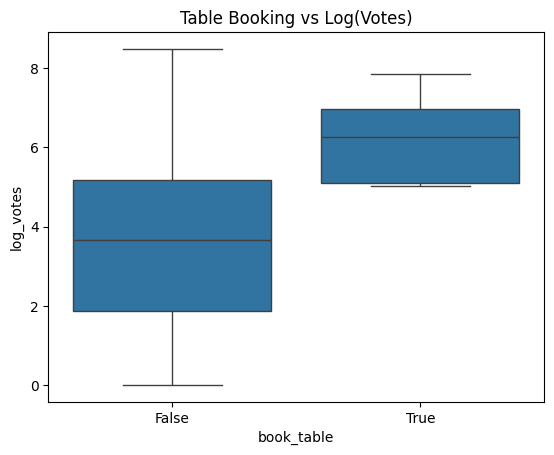

In [12]:
import numpy as np

df['log_votes'] = np.log1p(df['votes'])  # log1p handles 0 values
sns.boxplot(x='book_table', y='log_votes', data=df)
plt.title("Table Booking vs Log(Votes)")
plt.show()


### Rating Distribution


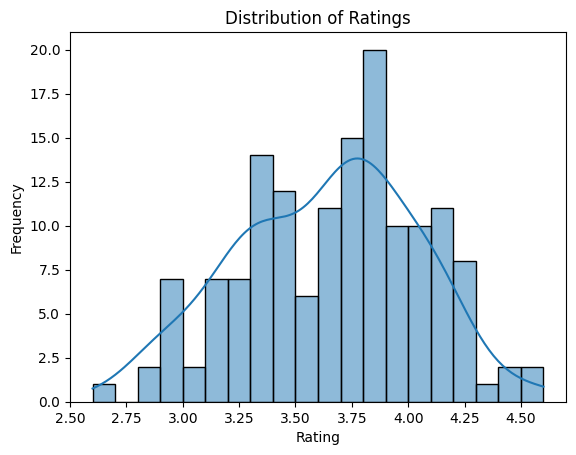

In [6]:
sns.histplot(df['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### Cost vs Rating


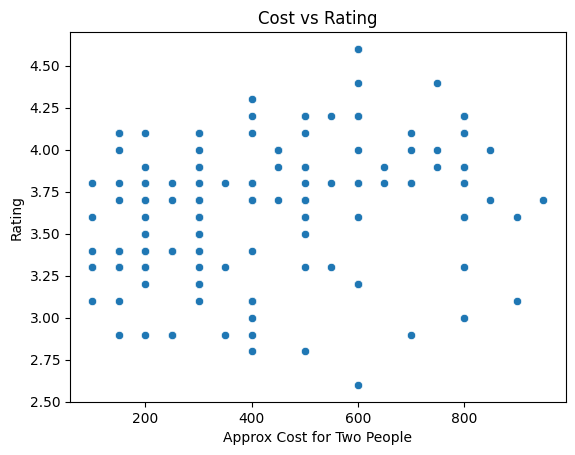

In [7]:
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title("Cost vs Rating")
plt.xlabel("Approx Cost for Two People")
plt.ylabel("Rating")
plt.show()


### Restaurant Type Frequency


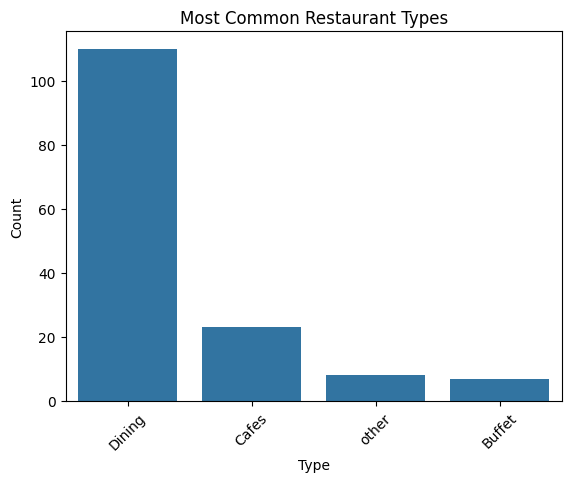

In [9]:
sns.countplot(x='listed_in(type)', data=df, order=df['listed_in(type)'].value_counts().index)
plt.title("Most Common Restaurant Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional: for readability
plt.show()


## 📌 Final Insights

- Restaurants with **online ordering** tend to have slightly better average ratings.
- **Table booking** is associated with a higher number of customer votes (engagement).
- Most ratings fall between **3.5 to 4.5**—indicating generally favorable reviews.
- There's **no strong correlation between price and rating**—expensive places don't always score better.
- **Delivery** and **Dine-out** are the most frequent types of listings.

This EDA helps highlight customer preferences and can support business decisions for online services and pricing strategy.
